# Practical 6
## Comparison among various Keras Optimizers
### Introduction

In deep learning, the performance of a neural network highly depends on the choice of **optimizer**. An optimizer is a mathematical algorithm that updates the **weights (W)** and **biases (b)** of the model to minimize the **loss function (L)**, which measures the error between predicted output and actual output.

The general weight update rule in optimization is:

**W<sub>t+1</sub> = W<sub>t</sub> - η × ∂L/∂W<sub>t</sub>**

where:

* **W<sub>t</sub>** = current weight
* **η (eta)** = learning rate
* **∂L/∂W<sub>t</sub>** = gradient of the loss function with respect to weights
* **W<sub>t+1</sub>** = updated weight

Optimizers differ mainly in how they compute the step size (learning rate adjustment) and how they utilize past gradients to accelerate convergence.

### Momentum in Optimization

Momentum is an extension to optimization methods, designed to improve convergence speed and stability. Instead of relying only on the current gradient, momentum considers past gradients to create a **velocity (v)** term:

**v<sub>t</sub> = β × v<sub>t-1</sub> + η × ∂L/∂W<sub>t</sub>**
**W<sub>t+1</sub> = W<sub>t</sub> - v<sub>t</sub>**

Here, **β** (0–1) is the momentum coefficient. This helps to smooth oscillations and accelerate movement in the right direction.

---

## Optimizers Used

### 1. SGD (Stochastic Gradient Descent)

Updates weights based on the gradient of the loss function with respect to the weights. It uses a fixed learning rate and can be slow to converge.

* **Update Rule:**
  W<sub>t+1</sub> = W<sub>t</sub> - η × ∂L/∂W<sub>t</sub>
* **Advantages:**

  * Simple and widely used.
  * Works well for convex problems.
* **Disadvantages:**

  * Sensitive to learning rate.
  * Slow convergence.
  * Can get stuck in local minima.

---

### 2. RMSprop (Root Mean Square Propagation)

Adapts the learning rate for each weight based on the average of recent magnitudes of the gradients for that weight. It helps to stabilize the learning process.

* **Update Rule:**
  E\[g²]<sub>t</sub> = ρ × E\[g²]<sub>t-1</sub> + (1 - ρ) × (∂L/∂W<sub>t</sub>)²
  W<sub>t+1</sub> = W<sub>t</sub> - η / √(E\[g²]<sub>t</sub> + ε) × ∂L/∂W<sub>t</sub>
* **Advantages:**

  * Adapts learning rate for each parameter.
  * Works well for non-stationary objectives.
* **Disadvantages:**

  * Sensitive to choice of hyperparameters.
  * Can sometimes lead to unstable results.

---

### 3. Adam (Adaptive Moment Estimation)

Combines the benefits of both RMSprop and momentum. It maintains a moving average of both the gradients and their squares, allowing for adaptive learning rates for each parameter.

* **Update Rule:**
  m<sub>t</sub> = β₁ × m<sub>t-1</sub> + (1 - β₁) × ∂L/∂W<sub>t</sub>
  v<sub>t</sub> = β₂ × v<sub>t-1</sub> + (1 - β₂) × (∂L/∂W<sub>t</sub>)²
  W<sub>t+1</sub> = W<sub>t</sub> - η × m̂<sub>t</sub> / (√v̂<sub>t</sub> + ε)
* **Advantages:**

  * Combines momentum and adaptive learning.
  * Works well in practice for most problems.
  * Fast convergence.
* **Disadvantages:**

  * May overfit on small datasets.
  * Can sometimes fail to converge to the optimal solution.

---

### 4. Adagrad (Adaptive Gradient Algorithm)

Adapts the learning rate for each parameter based on the historical gradients. It performs larger updates for infrequent parameters and smaller updates for frequent parameters.

* **Update Rule:**
  G<sub>t</sub> = G<sub>t-1</sub> + (∂L/∂W<sub>t</sub>)²
  W<sub>t+1</sub> = W<sub>t</sub> - η / √(G<sub>t</sub> + ε) × ∂L/∂W<sub>t</sub>
* **Advantages:**

  * Automatically adapts learning rate for each parameter.
  * Performs well with sparse data.
* **Disadvantages:**

  * Learning rate shrinks too much over time.
  * May stop learning prematurely.

---

### 5. Adadelta

An extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. It restricts the window of accumulated past gradients to a fixed size.

* **Update Rule:**
  E\[g²]<sub>t</sub> = ρ × E\[g²]<sub>t-1</sub> + (1 - ρ) × (∂L/∂W<sub>t</sub>)²
  ΔW<sub>t</sub> = - (√(E\[ΔW²]<sub>t-1</sub> + ε) / √(E\[g²]<sub>t</sub> + ε)) × ∂L/∂W<sub>t</sub>
  W<sub>t+1</sub> = W<sub>t</sub> + ΔW<sub>t</sub>
* **Advantages:**

  * Overcomes Adagrad’s aggressive learning rate decay.
  * No need to manually set learning rate.
* **Disadvantages:**

  * Performance can vary by dataset.
  * Slower in some cases compared to Adam.

---

### 6. Adamax

A variant of Adam based on the infinity norm. It is more stable when dealing with large gradients.

* **Update Rule:**
  u<sub>t</sub> = max(β₂ × u<sub>t-1</sub>, |∂L/∂W<sub>t</sub>|)
  W<sub>t+1</sub> = W<sub>t</sub> - η × m̂<sub>t</sub> / (u<sub>t</sub> + ε)
* **Advantages:**

  * More stable than Adam with large gradients.
  * Works well with high-dimensional parameter space.
* **Disadvantages:**

  * Slightly slower than Adam.
  * Not always better than Adam in practice.

+
+
+
+
---

### 7. Nadam (Nesterov-accelerated Adam)

Combines Adam with Nesterov momentum, which can lead to faster convergence in some cases.

* **Update Rule:**
  Combines Adam’s adaptive moment estimation with **Nesterov momentum**:
  m<sub>t</sub> = β₁ × m<sub>t-1</sub> + (1 - β₁) × ∂L/∂W<sub>t</sub>
  W<sub>t+1</sub> = W<sub>t</sub> - η × (β₁ × m̂<sub>t</sub> + (1 - β₁) × ∂L/∂W<sub>t</sub>) / (√v̂<sub>t</sub> + ε)
* **Advantages:**

  * Faster convergence than Adam in some tasks.
  * Combines benefits of momentum and adaptive learning.
* **Disadvantages:**

  * Computationally more complex.
  * May require more tuning.

---

### 8. SGD with Momentum

Enhances the standard SGD by adding a momentum term that helps accelerate gradients vectors in the right directions, leading to faster converging.

* **Update Rule:**
  v<sub>t</sub> = β × v<sub>t-1</sub> + η × ∂L/∂W<sub>t</sub>
  W<sub>t+1</sub> = W<sub>t</sub> - v<sub>t</sub>
* **Advantages:**

  * Faster convergence than vanilla SGD.
  * Helps escape local minima.
* **Disadvantages:**

  * Requires careful tuning of momentum parameter β.
  * Can overshoot if not tuned properly.

---

### Dataset: MNIST

The **MNIST dataset** is a benchmark dataset of handwritten digits (0–9). It contains:

* **60,000 training images**
* **10,000 test images**
* Each image is **28×28 grayscale pixels**

This dataset is widely used for testing optimization techniques in image classification problems.

---

### Import the necessary libraries and load the data

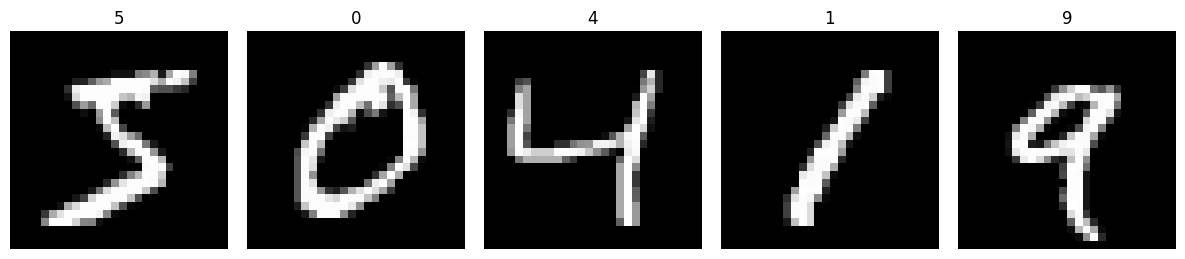

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import jax.numpy as jnp
from matplotlib.patches import Rectangle, ConnectionPatch

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Plot a subset of images with labels
plt.figure(figsize=(12, 12))
plot_index = 1
num_images = 5  # Number of images to plot

for i in range(num_images):
    plt.subplot(5, 5, plot_index)  # Adjust grid to fit images
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"{y_train[i]}")
    plt.axis("off")
    plot_index += 1

plt.tight_layout()
plt.show()

### Dataset Shape

In [5]:
n,x,y=x_train.shape

In [5]:
x,y,n

(28, 28, 60000)

### Define the model

In [3]:
def build_model(opt_name, uniform_params):
    model = models.Sequential([
        layers.InputLayer(shape=(x,y,1)),
        layers.Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=2),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')  # Use activation='softmax' for probabilities
    ])
    # Handle optimizer creation
    if opt_name == "SGD+Momentum":
        optimizer = optimizers[opt_name](uniform_params["learning_rate"])
    else:
        optimizer = optimizers[opt_name](learning_rate=uniform_params["learning_rate"])

    model.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return model

### Train the model with different optimizers and uniform parameters


Training with Adadelta...
Test accuracy (Adadelta): 0.8631
Test loss (Adadelta): 0.8866


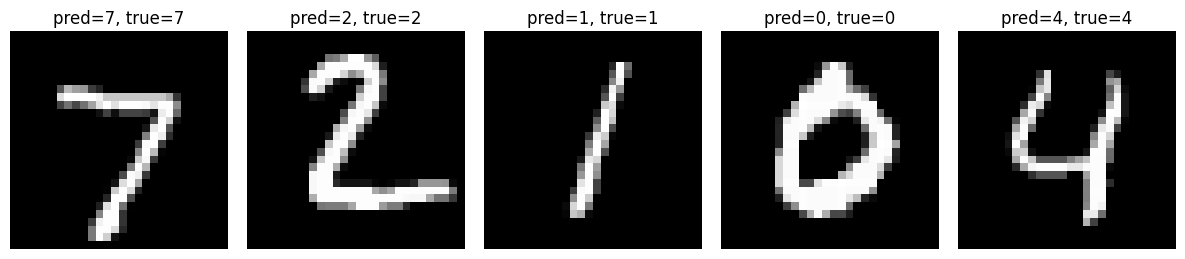


Training with Adagrad...
Test accuracy (Adagrad): 0.9728
Test loss (Adagrad): 0.1029


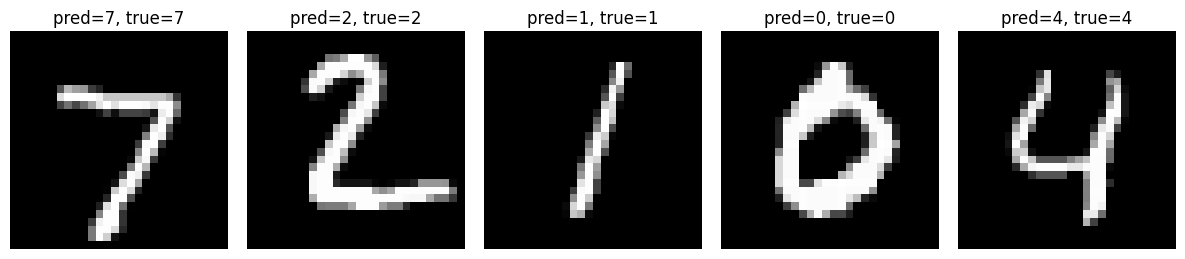


Training with Adam...
Test accuracy (Adam): 0.9876
Test loss (Adam): 0.0431


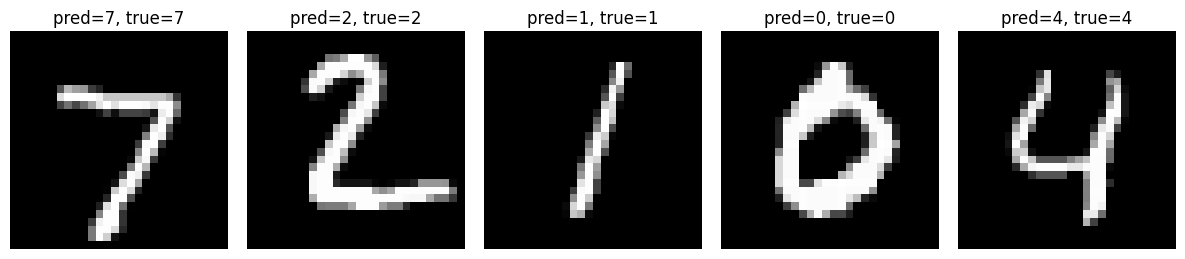


Training with Adamax...
Test accuracy (Adamax): 0.9879
Test loss (Adamax): 0.0543


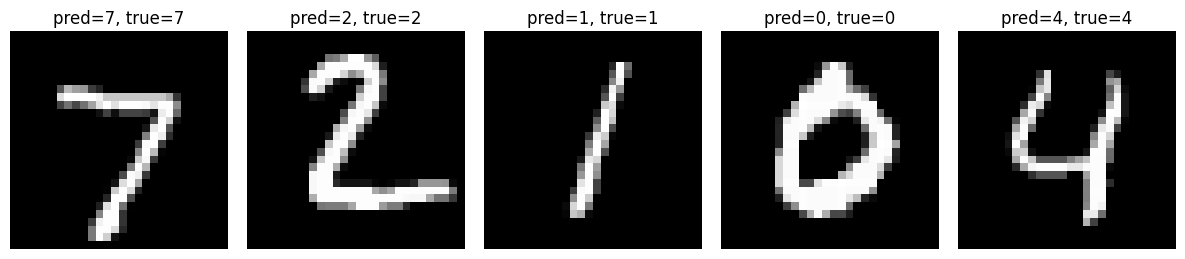


Training with AdamW...
Test accuracy (AdamW): 0.9856
Test loss (AdamW): 0.0550


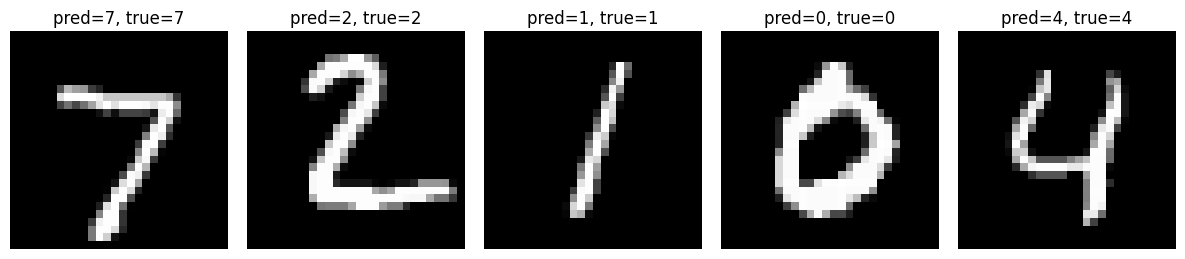


Training with Nadam...
Test accuracy (Nadam): 0.9839
Test loss (Nadam): 0.0573


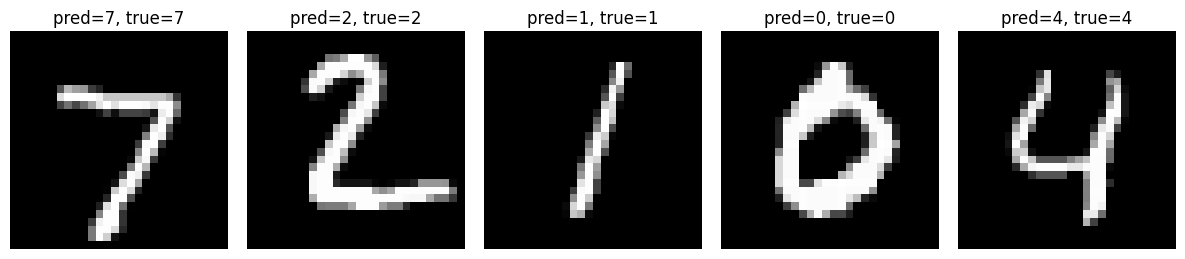


Training with RMSprop...
Test accuracy (RMSprop): 0.9857
Test loss (RMSprop): 0.0725


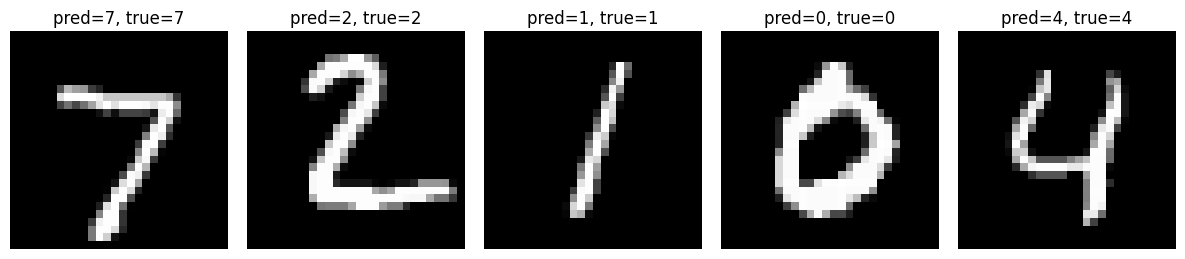


Training with SGD...
Test accuracy (SGD): 0.9823
Test loss (SGD): 0.0558


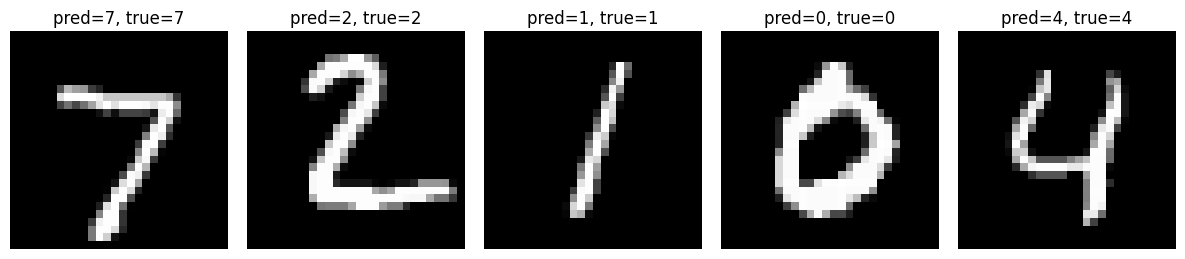


Training with SGD+Momentum...
Test accuracy (SGD+Momentum): 0.9836
Test loss (SGD+Momentum): 0.0547


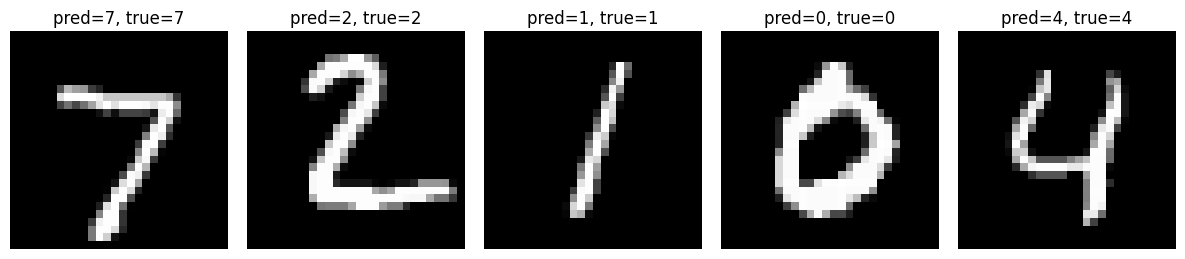

C:\Users\shiva\AppData\Local\Temp\ipykernel_35016\3076034986.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


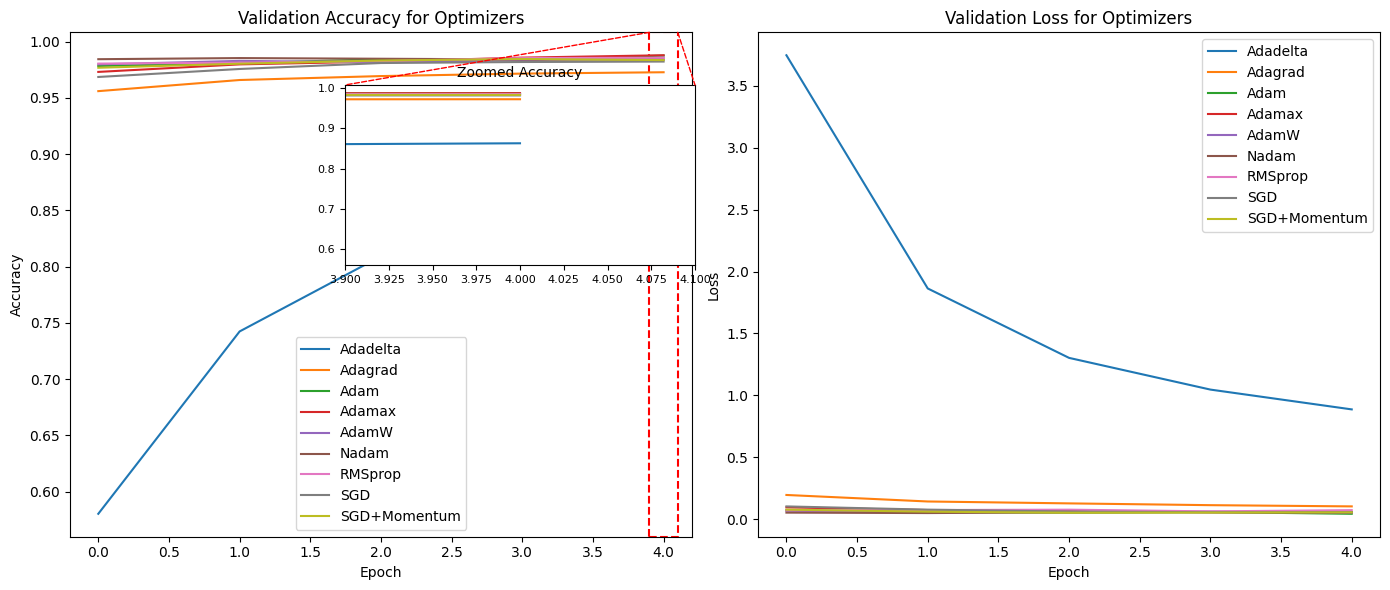

In [8]:
epochs = 5
batch_size = 32

# Supported keras optimizers
optimizers = {
    "Adadelta": tf.keras.optimizers.Adadelta,
    "Adagrad": tf.keras.optimizers.Adagrad,
    "Adam": tf.keras.optimizers.Adam,
    "Adamax": tf.keras.optimizers.Adamax,
    "AdamW": tf.keras.optimizers.AdamW,
    "Nadam": tf.keras.optimizers.Nadam,
    "RMSprop": tf.keras.optimizers.RMSprop,
    "SGD": tf.keras.optimizers.SGD,
    "SGD+Momentum": lambda lr: tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9),
}

uniform_params = {
    "learning_rate": 0.001,
    "beta_1": 0.9,
    "beta_2": 0.9,
    "momentum": 0.9,
}

histories = {}

for name in optimizers.keys():
    
    print(f"\nTraining with {name}...")
    
    model = build_model(name,uniform_params)
    
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(x_test, y_test))
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    print(f"Test accuracy ({name}): {test_acc:.4f}")
    print(f"Test loss ({name}): {test_loss:.4f}")
    
    histories[name] = history
    plt.figure(figsize=(12, 12))
    plot_index = 1
    num_images = 5  # Number of images to plot

    for i in range(num_images):
        
        sample=x_test[i:i+1]
        true=y_test[i:i+1]
        pred = model.predict(sample,verbose=0)
        predicted_label = jnp.argmax(pred)
        sample=sample.reshape(28, 28).astype('float32') / 255.0
        plt.subplot(5, 5, plot_index)  # Adjust grid to fit images
        plt.imshow(sample, cmap="gray")
        plt.title(f"pred={predicted_label}, true={true[0]}")
        plt.axis("off")
        plot_index += 1

    plt.tight_layout()
    plt.show()

# Main plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy subplot
for name, history in histories.items():
    ax1.plot(history.history['val_accuracy'], label=f'{name}')
    
ax1.set_title('Validation Accuracy for Optimizers')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss subplot
for name, history in histories.items():
    ax2.plot(history.history['val_loss'], label=f'{name}')
    
ax2.set_title('Validation Loss for Optimizers')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# === Zoomed-in Accuracy subplot ===
axins1 = fig.add_axes([0.25, 0.55, 0.25, 0.3])  # [x, y, width, height] in figure coords

for name, history in histories.items():
    axins1.plot(history.history['val_accuracy'], label=f'{name}')
    
axins1.set_xlim(3.9, 4.1)   # zoom range
axins1.set_title("Zoomed Accuracy", fontsize=10)
axins1.tick_params(axis='both', labelsize=8)

# Draw rectangle in main plot (Accuracy)
rect = Rectangle((3.9, ax1.get_ylim()[0]),   # (x, y)
                 0.2,                        # width (4.1-3.9)
                 ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
                 linewidth=1.5, edgecolor='red',
                 facecolor='none', linestyle="--")

ax1.add_patch(rect)

# Connect rectangle with zoomed plot
con1 = ConnectionPatch(xyA=(3.9, ax1.get_ylim()[1]), xyB=(3.9, axins1.get_ylim()[1]),
                       coordsA="data", coordsB="data", axesA=ax1, axesB=axins1,
                       color="red", linestyle="--")

con2 = ConnectionPatch(xyA=(4.1, ax1.get_ylim()[1]), xyB=(4.1, axins1.get_ylim()[1]),
                       coordsA="data", coordsB="data", axesA=ax1, axesB=axins1,
                       color="red", linestyle="--")
fig.add_artist(con1)
fig.add_artist(con2)

plt.tight_layout()
plt.show()

### Graphical analysis of optimizers

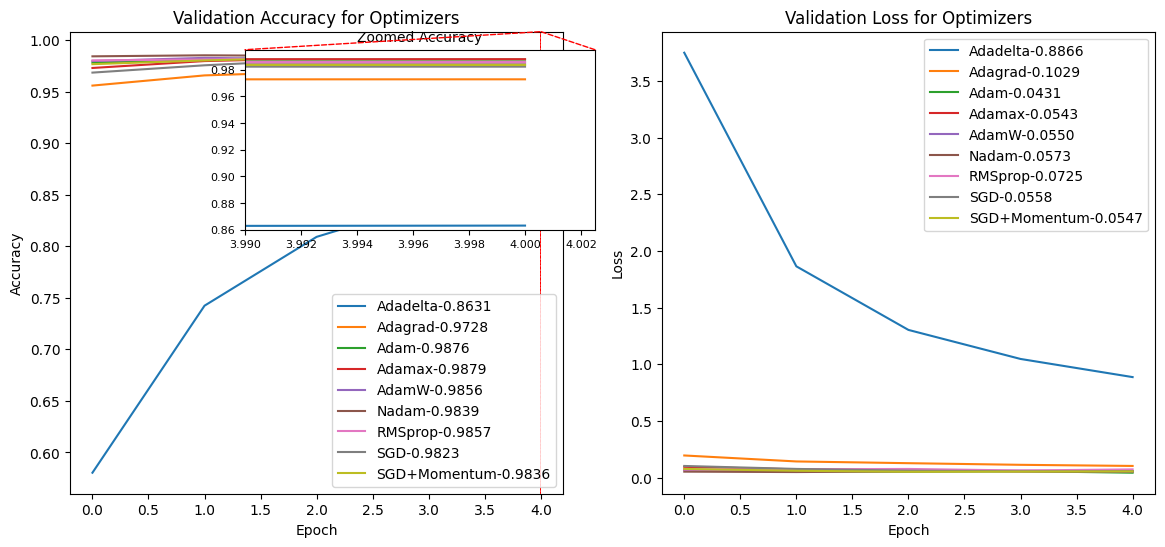

In [44]:
# Main plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy subplot
for name, history in histories.items():
    ax1.plot(history.history['val_accuracy'], label=f'{name}-{history.history['val_accuracy'][-1]:.4f}')
    
ax1.set_title('Validation Accuracy for Optimizers')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss subplot
for name, history in histories.items():
    ax2.plot(history.history['val_loss'], label=f'{name}-{history.history['val_loss'][-1]:.4f}')
    
ax2.set_title('Validation Loss for Optimizers')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# === Zoomed-in Accuracy subplot ===
axins1 = fig.add_axes([0.25, 0.55, 0.25, 0.3])  # [x, y, width, height] in figure coords

for name, history in histories.items():
    axins1.plot(history.history['val_accuracy'], label=f'{name}-{history.history['val_accuracy'][-1]:.4f}')
    
axins1.set_xlim(3.99, 4.0025)   # zoom range
axins1.set_ylim(0.86, 0.995) 
axins1.set_title("Zoomed Accuracy", fontsize=10)
axins1.tick_params(axis='both', labelsize=8)

# Draw rectangle in main plot (Accuracy)
rect = Rectangle((3.99, ax1.get_ylim()[0]),   # (x, y)
                 0.0025,                        # width (4.0025-3.99)
                 ax1.get_ylim()[1] - ax1.get_ylim()[0],  # height
                 linewidth=0.5, edgecolor='red',
                 facecolor='none', linestyle="--")

ax1.add_patch(rect)

# Connect rectangle with zoomed plot
con1 = ConnectionPatch(xyA=(3.99, ax1.get_ylim()[1]), xyB=(3.99, axins1.get_ylim()[1]),
                       coordsA="data", coordsB="data", axesA=ax1, axesB=axins1,
                       color="red", linestyle="--")

con2 = ConnectionPatch(xyA=(4.0025, ax1.get_ylim()[1]), xyB=(4.0025, axins1.get_ylim()[1]),
                       coordsA="data", coordsB="data", axesA=ax1, axesB=axins1,
                       color="red", linestyle="--")
fig.add_artist(con1)
fig.add_artist(con2)

#plt.tight_layout()
plt.show()

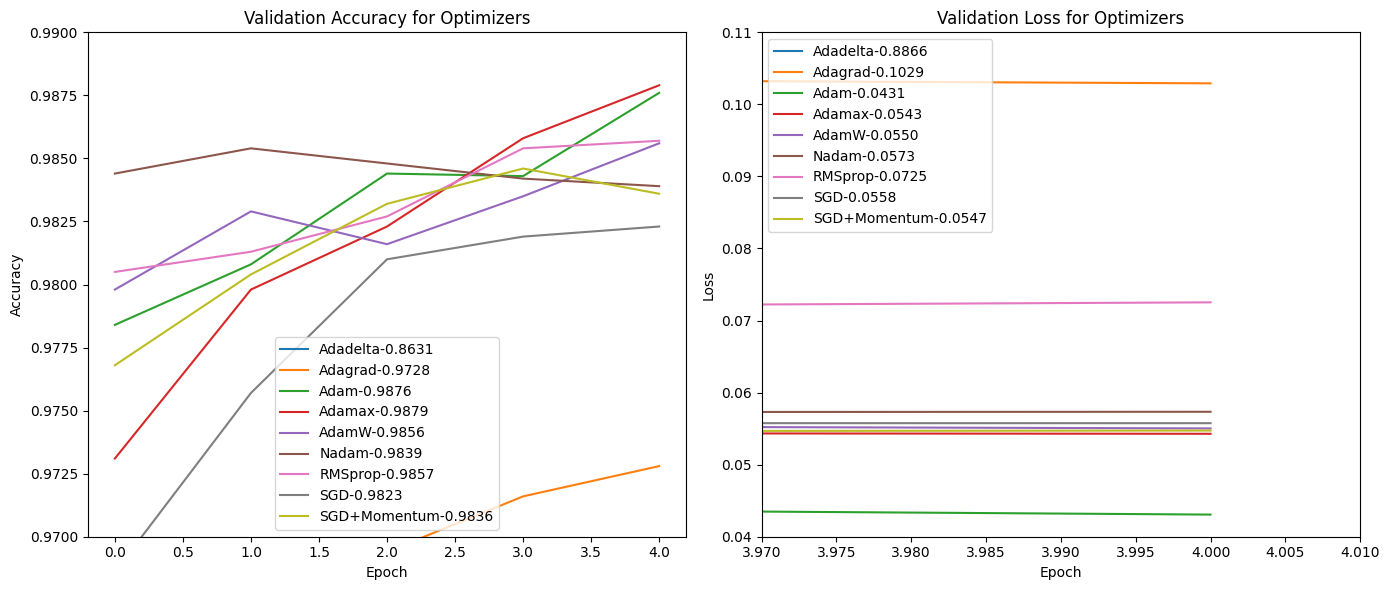

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Accuracy subplot
for name, history in histories.items():
    ax1.plot(history.history['val_accuracy'], label=f'{name}-{history.history["val_accuracy"][-1]:.4f}')

ax1.set_title('Validation Accuracy for Optimizers')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.97, 0.99)   # <--- scale Accuracy axis
ax1.legend()

# Loss subplot
for name, history in histories.items():
    ax2.plot(history.history['val_loss'], label=f'{name}-{history.history["val_loss"][-1]:.4f}')

ax2.set_title('Validation Loss for Optimizers')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_ylim(0.04, 0.11)    # <--- scale Loss axis
ax2.set_xlim(3.97, 4.01)
ax2.legend()
plt.tight_layout()
plt.show()

### Visualize model architecture

d:\venv\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


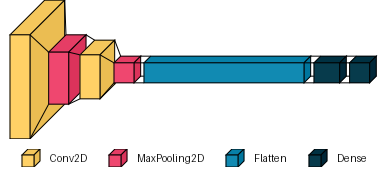

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,242 (1.65 MB)

 Trainable params: 431,242 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

{'name': 'sequential_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config

In [7]:
# Visualize the model architecture with visualkeras and tf.keras.utils.plot_model
try:
    import visualkeras
except Exception:
    # in a Jupyter notebook use %pip; fallback uses sys.executable for script contexts
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "visualkeras", "graphviz", "pydot"])
    import visualkeras

from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
import os

# Build a representative model (uses build_model from earlier cells)
model = build_model("Adamax", uniform_params)

# 1) visualkeras layered view (PIL image saved)
try:
    visualkeras.layered_view(model, legend=True, to_file="model_visual.png")
    if os.path.exists("model_visual.png"):
        display(Image("model_visual.png"))
except Exception as e:
    print("visualkeras error:", e)
'''
# 2) Keras plot_model (requires graphviz + pydot)
try:
    plot_model(model, to_file="model_graph.png", show_shapes=True, show_layer_names=True)
    if os.path.exists("model_graph.png"):
        display(Image("model_graph.png"))
except Exception as e:
    print("plot_model error (needs graphviz/pydot):", e)
'''
#Summary
model.summary()

# Show model config
print(model.get_config())